In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

In [ ]:
# cargar municipios y mostrarlos en el mapa

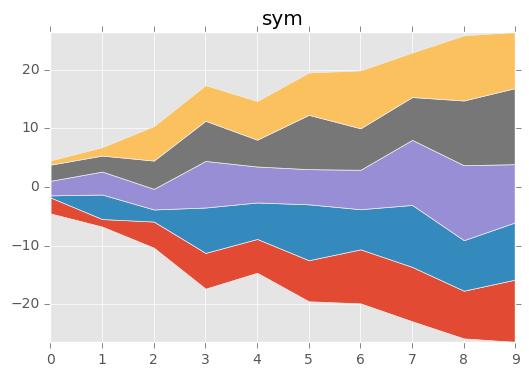

In [4]:
X = np.arange(0, 10, 1) 
Y = X + 5 * np.random.random((5, X.size))

plt.stackplot(X, *Y, baseline="sym")
plt.title("sym")
plt.axis('tight')
plt.show()